## Plant Disease Detection

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# https://arxiv.org/abs/1511.08060
PATH = 'data/plantvillage/crowdai/'
sz=299
arch=resnext50
bs=16

In [3]:
disease_classes = {'c_1': 'Apple Scab, Venturia inaequalis',
                   'c_2': 'Apple Black Rot, Botryosphaeria obtusa',
                   'c_3': 'Apple Cedar Rust, Gymnosporangium juniperi-virginianae',
                   'c_4': 'Apple healthy',
                   'c_5': 'Blueberry healthy',
                   'c_6': 'Cherry healthy',
                   'c_7': 'Cherry Powdery Mildew, Podosphaera spp.',
                   'c_8': 'Corn Gray Leaf Spot, Cercospora zeae-maydis',
                   'c_9': 'Corn Common Rust, Puccinia sorghi',
                   'c_10': 'Corn healthy',
                   'c_11': 'Corn Northern Leaf Blight, Exserohilum turcicum',
                   'c_12': 'Grape Black Rot, Guignardia bidwellii,',
                   'c_13': 'Grape Black Measles (Esca), Phaeomoniella aleophilum, Phaeomoniella chlamydospora',
                   'c_14': 'Grape Healthy',
                   'c_15': 'Grape Leaf Blight, Pseudocercospora vitis',
                   'c_16': 'Orange Huanglongbing (Citrus Greening), Candidatus Liberibacter spp.',
                   'c_17': 'Peach Bacterial Spot, Xanthomonas campestris',
                   'c_18': 'Peach healthy',
                   'c_19': 'Bell Pepper Bacterial Spot, Xanthomonas campestris',
                   'c_20': 'Bell Pepper healthy',
                   'c_21': 'Potato Early Blight, Alternaria solani',
                   'c_22':  'Potato healthy',
                   'c_23': 'Potato Late Blight, Phytophthora infestans',
                   'c_24': 'Raspberry healthy ',
                   'c_25': 'Soybean healthy',
                   'c_26': 'Squash Powdery Mildew, Erysiphe cichoracearum, Sphaerotheca fuliginea',
                   'c_27': 'Strawberry Healthy',
                   'c_28': 'Strawberry Leaf Scorch, Diplocarpon earlianum',
                   'c_29': 'Tomato Bacterial Spot, Xanthomonas campestris pv. vesicatoria',
                   'c_30': 'Tomato Early Blight, Alternaria solani',
                   'c_31': 'Tomato Late Blight, Phytophthora infestans',
                   'c_32': 'Tomato Leaf Mold, Fulvia fulva',
                   'c_33': 'Tomato Septoria Leaf Spot, Septoria lycopersici',
                   'c_34': 'Tomato Two Spotted Spider Mite, Tetranychus urticae',
                   'c_35': 'Tomato Target Spot, Corynespora cassiicola',
                   'c_36': 'Tomato Mosaic Virus',
                   'c_37': 'Tomato Yellow Leaf Curl Virus',
                   'c_38': 'Tomato healthy'}


In [4]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4, trn_name='train', val_name='val')
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [ ]:
learn.model.state_dict()

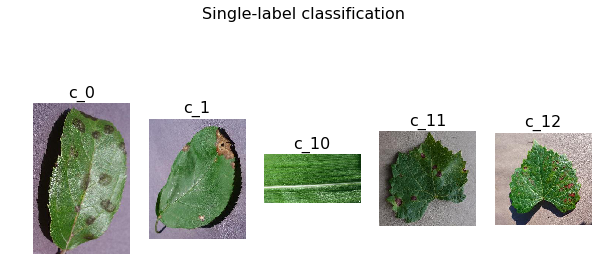

In [4]:
def get_1st(path): return glob(f'{path}/*.*')[0]
dc_path = f"{PATH}val/"
list_paths = [get_1st(f"{dc_path}{klass}") for klass in data.classes[:5]]
plots_from_files(list_paths, titles=data.classes, maintitle="Single-label classification")

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 73%|███████▎  | 850/1170 [04:30<01:41,  3.14it/s, loss=3.53] 

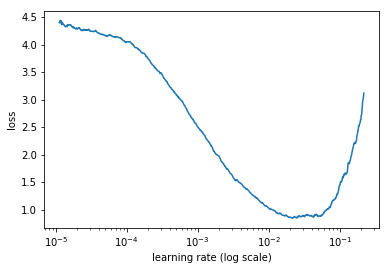

In [4]:
learn.lr_find()
learn.sched.plot()

In [5]:
learn.precompute = False

In [6]:
lr = 1e-4
learn.fit(lr, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

  0%|          | 0/1170 [00:00<?, ?it/s]                     


Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 86%|████████▌ | 1004/1170 [07:53<01:18,  2.12it/s, loss=2.19]


KeyboardInterrupt: 

In [16]:
learn.fit(1e-3, 6, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.816807   0.441511   0.894062  
    1      0.750423   0.31028    0.91625                       
    2      0.553343   0.260738   0.93                          
    3      0.48376    0.222569   0.93875                       
    4      0.444451   0.19339    0.949062                      
    5      0.432014   0.185623   0.947812                      



[0.1856229, 0.9478125]

In [17]:
learn.save('224_all_50_94')

### Differential learning rates

In [18]:
learn.unfreeze()
lr=np.array([1e-5,1e-4,1e-3])

In [19]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.365018   0.120032   0.968438  
    1      0.267917   0.081985   0.978125                      
    2      0.219416   0.063821   0.98125                       



[0.06382141, 0.98125]

In [20]:
learn.save('224_all_50_98')

In [23]:
learn.unfreeze()

In [24]:
lr = 1e-3
learn.fit(lr, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

  1%|          | 7/1170 [00:07<19:25,  1.00s/it, loss=0.175]

Exception in thread Thread-19:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      0.149724   0.033741   0.990625  
    1      0.104362   0.020812   0.993438                       
    2      0.08365    0.024358   0.9925                         
    3      0.075453   0.016826   0.993438                       
    4      0.042278   0.009339   0.996875                       
    5      0.042015   0.008728   0.997188                       
    6      0.069029   0.014169   0.994375                       
    7      0.042418   0.012289   0.99625                        
    8      0.041664   0.011866   0.995                          
    9      0.037222   0.006474   0.9975                         
    10     0.035803   0.008508   0.9975                         
    11     0.023977   0.005725   0.998125                       
    12     0.019687   0.00575    0.99875                        
    13     0.016648   0.005992   0.998438                       



[0.005992429, 0.9984375]

In [48]:
learn.freeze()
lr = 1e-3
learn.fit(lr, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                        
    0      0.008651   0.006592   0.998125  
    1      0.009468   0.005667   0.998438                        
    2      0.008238   0.005896   0.99875                         
    3      0.00778    0.005623   0.998438                        
    4      0.009672   0.005877   0.998438                        
    5      0.00849    0.00599    0.998125                        
    6      0.014292   0.006169   0.998125                        
    7      0.007648   0.006306   0.998438                        
    8      0.006671   0.005468   0.99875                         
    9      0.011217   0.006126   0.9975                          
    10     0.009274   0.005592   0.998125                        
    11     0.011436   0.006158   0.998125                        
    12     0.007763   0.006461   0.998125                        
    13     0.012891   0.006129   0.998438                        



[0.006129304, 0.9984375]

In [76]:
learn.save('224_all_50_998_final')

In [6]:
learn.load('224_all_50_998_final')

In [9]:
def accuracy(preds, targs):
    preds = torch.from_numpy(preds)
    targs = torch.from_numpy(targs)
    preds = torch.max(preds, dim=1)[1]
    return (preds==targs).float().mean()

In [10]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [11]:
accuracy(probs,y)

0.99875

In [18]:
data.classes

['c_0',
 'c_1',
 'c_10',
 'c_11',
 'c_12',
 'c_13',
 'c_14',
 'c_15',
 'c_16',
 'c_17',
 'c_18',
 'c_19',
 'c_2',
 'c_20',
 'c_21',
 'c_22',
 'c_23',
 'c_24',
 'c_25',
 'c_26',
 'c_27',
 'c_28',
 'c_29',
 'c_3',
 'c_30',
 'c_31',
 'c_32',
 'c_33',
 'c_34',
 'c_35',
 'c_36',
 'c_37',
 'c_4',
 'c_5',
 'c_6',
 'c_7',
 'c_8',
 'c_9']

In [55]:
!ls {PATH}

models	tmp  train  val


In [ ]:
plots_from_files

In [75]:
len(data.val_ds.fnames)

3200

In [13]:
ls {PATH}

                                                             
models/  pato_1._crop.jpeg*  pato_1.jpeg*  tmp/  train/  val/


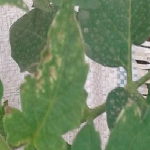

In [7]:
fn = 'pato_1._crop.jpeg'
batch = Image.open(PATH+fn).resize((150, 150))
batch

In [8]:
trn_tfms, val_tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
ds = FilesIndexArrayDataset([fn], np.array([0]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
image_class = data.classes[np.argmax(preds)]
disease_classes[image_class], np.argmax(preds)

('Tomato Early Blight, Alternaria solani', 24)

### Show where the net thinks the disease is

In [12]:
learn.model

Sequential(
  (0): Conv2d (3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (4): Sequential(
    (0): Sequential(
      (0): LambdaMap(
        (0): Sequential(
          (0): Sequential(
            (0): Conv2d (64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (2): ReLU()
            (3): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (5): ReLU()
          )
          (1): Conv2d (128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
        )
        (1): Sequential(
          (0): Conv2d (64, 256, kernel_size=(1, 1)

In [15]:
m = nn.Sequential(*children(learn.model)[:-2], 
                  nn.Conv2d(512, 2, 3, padding=1), 
                  nn.AdaptiveAvgPool2d(1), Flatten(), 
                  nn.LogSoftmax())

In [16]:
m

Sequential(
  (0): Conv2d (3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (4): Sequential(
    (0): Sequential(
      (0): LambdaMap(
        (0): Sequential(
          (0): Sequential(
            (0): Conv2d (64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (2): ReLU()
            (3): Conv2d (128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True)
            (5): ReLU()
          )
          (1): Conv2d (128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True)
        )
        (1): Sequential(
          (0): Conv2d (64, 256, kernel_size=(1, 1)

In [17]:
learn = ConvLearner.from_model_data(m, data)

In [18]:
learn.freeze_to(-4)

In [19]:
m[-1].trainable

True

In [20]:
m[-4].trainable

True

In [21]:
learn.fit(0.01, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/1170 [00:00<?, ?it/s]


ValueError: Expected 4D tensor as input, got 2D tensor instead.

In [22]:
class SaveFeatures():
    features=None
    def __init__(self, m): self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): self.features = to_np(output)
    def remove(self): self.hook.remove()

In [23]:
x,y = next(iter(data.val_dl))
x,y = x[None,1], y[None,1]

vx = Variable(x.cuda(), requires_grad=True)

In [24]:
sf = SaveFeatures(m[-4])
py = m(Variable(x.cuda()))
sf.remove()

py = np.exp(to_np(py)[0]); py

ValueError: Expected 4D tensor as input, got 2D tensor instead.